##### Importing and Cleaning Data

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# setting a random seed
np.random.seed(42)

# Data Import and Cleaning

# Load the data
data = pd.read_excel('3000_salary.xlsx')

# Drop missing values
data_clean = data.dropna()

# Resample the data
resampled_data = data_clean.groupby('SubTitle', group_keys=False).apply(lambda x: x.sample(max(len(x), 700), replace=True))

# Convert 'SubTitle' and 'Location' to one-hot encoded variables
resampled_data = pd.get_dummies(resampled_data, columns=['SubTitle', 'Location'])

# Assuming 'Annual_salary' as the target variable and other columns as predictors
# Make sure to exclude non-numeric and target variable columns
X = resampled_data.drop(['Annual_salary', 'Title', 'Company', 'Salary'], axis=1)  # Adjust as needed
y = resampled_data['Annual_salary']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



##### Model Building and Fine Tuning

Model 1: `Linear Regression`

In [2]:
from sklearn.linear_model import LinearRegression

np.random.seed(42)

model2 = LinearRegression()
# Fit the model
model2.fit(X_train, y_train)

# Predict on the test set
y_pred = model2.predict(X_test)

acc2 = model2.score(X_test.values,y_test.values)

print("acc:", acc2)

# Calculate the mean squared error
mse2 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse2}")

# Calculate the Root Mean Squared Error
rmse2 = np.sqrt(mse2)
print(f"Root Mean Squared Error: {rmse2}")

# Calculate the R-squared Score
r2_2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2_2}")


acc: 0.7345785567898016
Mean Squared Error: 400614044.98636264
Root Mean Squared Error: 20015.345237751026
R-squared Score: 0.7345785567898016


c:\Users\kukud\miniconda3\envs\DsOne\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Model 2: `Random Forest`

In [4]:
np.random.seed(42)
# Create a Random Forest Regressor model
model = RandomForestRegressor(random_state=0)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

acc = model.score(X_test.values,y_test.values)
print("acc:",acc)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Calculate the R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

acc: 0.9293315082650243
Mean Squared Error: 108563684.31454435
Root Mean Squared Error: 10419.389824483214
R-squared Score: 0.9293315082650243


c:\Users\kukud\miniconda3\envs\DsOne\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Model 3: `Random Forest with GridSearch CV Optimization`

In [7]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)
# Create a Random Forest Regressor model
model = RandomForestRegressor(random_state=0)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best = best_model.predict(X_test)

acc = best_model.score(X_test.values,y_test.values)
print("acc:",acc)

# Calculate the mean squared error using the best model
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"Best Model Mean Squared Error: {mse_best}")

# Calculate the Root Mean Squared Error using the best model
rmse_best = np.sqrt(mse_best)
print(f"Best Model Root Mean Squared Error: {rmse_best}")

# Calculate the R-squared Score using the best model
r2_best = r2_score(y_test, y_pred_best)
print(f"Best Model R-squared Score: {r2_best}")


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
acc: 0.9293984218782295
Best Model Mean Squared Error: 106213389.49489917
Best Model Root Mean Squared Error: 10305.988040692613
Best Model R-squared Score: 0.9293984218782295


c:\Users\kukud\miniconda3\envs\DsOne\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


c:\Users\kukud\miniconda3\envs\DsOne\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kukud\miniconda3\envs\DsOne\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kukud\miniconda3\envs\DsOne\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


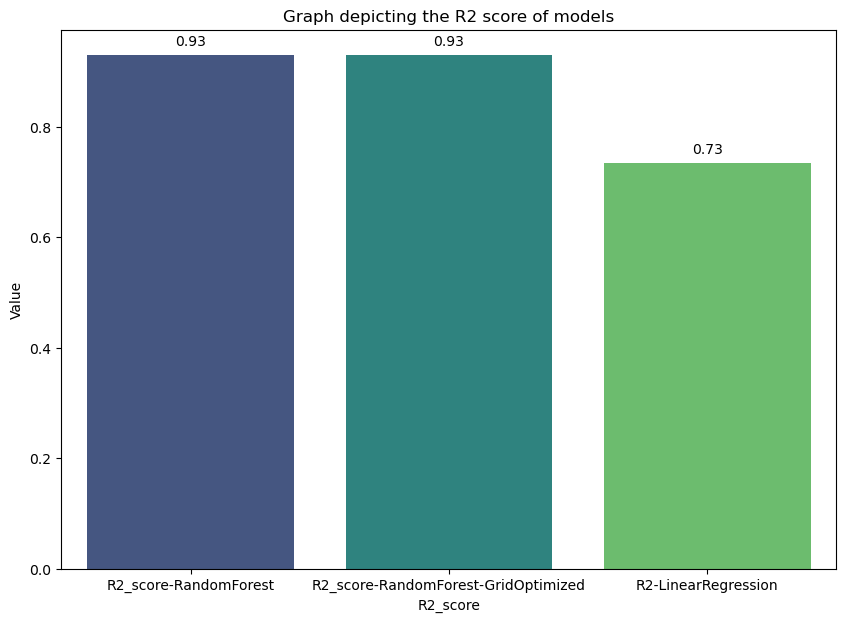

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
R2_score = ['R2_score-RandomForest', 'R2_score-RandomForest-GridOptimized', 'R2-LinearRegression']
values = [r2, r2_best, r2_2]

# Create a pandas DataFrame
data = {'R2_score': R2_score, 'Value': values}
df = pd.DataFrame(data)

# Plotting with Seaborn
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='R2_score', y='Value', data=df, palette='viridis')
# Display values inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Graph depicting the R2 score of models')
plt.show()




`Root Mean Squared Errors: `

**Random Forest RMSE : 10419.389824483214**\
**Random Forest (GridSearch Optimized) RMSE : 10305.988040692613**\
**Linear Regression RMSE : 20015.345237751026**

##### From the models we used we can see that `Random Forest Regressor` with grid search optimisation gives us better results with a better R2 score and lower RMSE error compared to the Linear Regression. So, we finally chose Random Forest Regression as our choice of model for this project.

Exporting our model using `Pickle`

In [ ]:
import pickle

# Saving the model to a file
with open('salary_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)